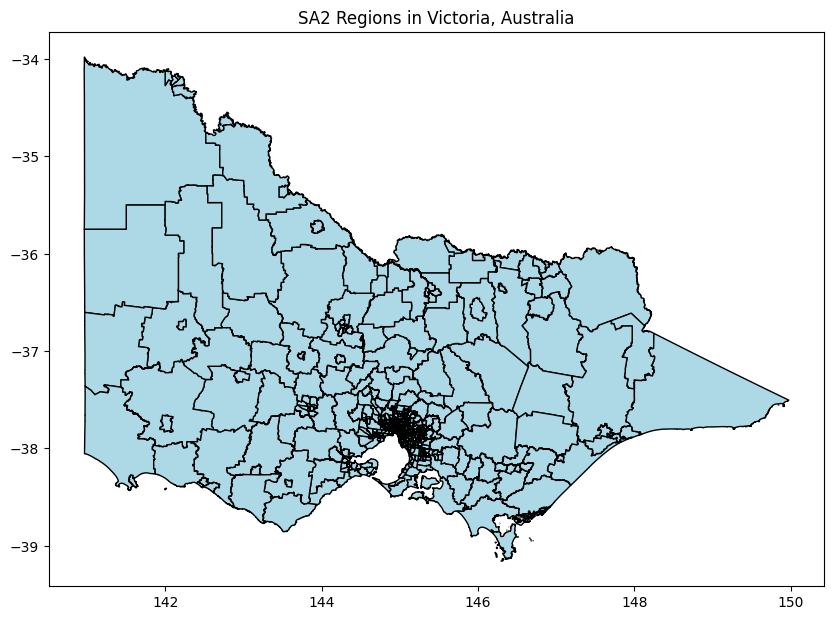

In [5]:
import requests
import zipfile
import io
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Download the shapefile
url = "https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SA2_2021_AUST_SHP_GDA2020.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
extract_path = "sa2_shapefile"
zip_file.extractall(extract_path)  # Extract to a folder named "sa2_shapefile"

# Step 2: Load the shapefile
shapefile_name = "SA2_2021_AUST_GDA2020.shp"
shapefile_path = os.path.join(extract_path, shapefile_name)

gdf = gpd.read_file(shapefile_path)

# Step 3: Filter to only include areas within Victoria (State code 2)
victoria_gdf = gdf[gdf['STE_CODE21'] == '2']

# Step 4: Plot the Victoria SA2 regions
victoria_gdf.plot(figsize=(10, 10), edgecolor='k', color='lightblue')
plt.title('SA2 Regions in Victoria, Australia')
plt.show()